<a href="https://colab.research.google.com/github/denncraft/AI_ML_notes/blob/main/Deep_learning_2023_chapter_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пример линейного классификатора на Tensorflow с нуля, без исходного датасета

Создание набора случайных точек двух классов на двумерной плоскости

In [1]:
import numpy as np

num_samples = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1,0.5],[0.5,1]], size=num_samples)
positive_samples = np.random.multivariate_normal(mean=[3,0], cov=[[1,0.5],[0.5,1]], size=num_samples)

объединяем два массива в один с формой (2000,2)

In [4]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
inputs.shape

(2000, 2)

генерируем соответствующие целевые метки

In [5]:
targets = np.vstack((np.zeros((num_samples, 1), dtype="float32"),
                     np.ones((num_samples, 1), dtype="float32")
                     ))

посмотрим на массивы точек

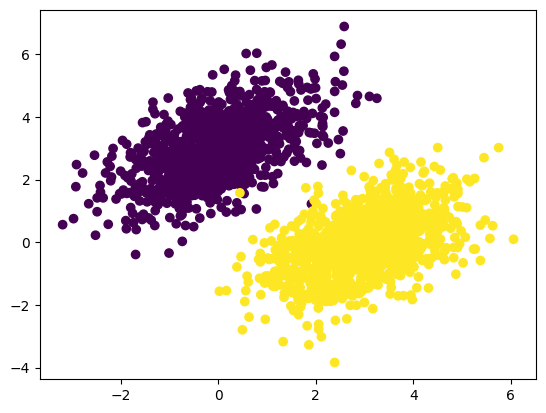

In [10]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

линейный классификатор - это афинное преобразование (prediction = W * input + b)

создадим переменные для линейного классфикатора

In [15]:
import tensorflow as tf
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

самая простая модель (функция прямого прохода)

`prediction = W * input + b`

In [16]:
def model(inputs):
  return tf.matmul(inputs, W) + b

т.к. наши тензоры входных данных и весов двумерные, то получаем

`prediction = [[W1], [W2]] * [x,y] + b = (W1 * x) + (W2 * y) + b`

определим фнкцию потерь

тензор per_samples_losses имеет ту же форму, что и тензоры targets и predictions, и содержит оценци потерь для каждого образца

как результат нам нужно получить усредненные оценки потерь по образцам в одно скалярное значение потерь: именно это делает reduce_mean

In [17]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

далее нужно описать фунцкия одного шага обучения
1. получить предсказание результата
2. расчитать ошибку
3. рассчить градиент потерь по ошибке
4. изменить веса: W и b

In [18]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss


In [ ]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

определяя результат обучения можно сказать, что значения prediction для класса 0 должны быть в диапазоне от 0 до 0.5, а для класса 1 в диапазоне от 0.5 до 1.

С другой стороны перед нами линеная функция `y = x * a + b` , т.е.
`(W1 * x) + (W2 * y) + b = 0.5` или `y = (-W1 / W2 * x) + (0.5 - b) / W2`

наложим линию на исходные массивы точек

In [23]:
W.shape

TensorShape([2, 1])

In [25]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x (0.5 - b) / W[1]
plt.plot(x, y, "-r") # -r - цвет линии
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0] > 0.5)

TypeError: 'numpy.ndarray' object is not callable